In [108]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians,log,log10
import json
from data import listedEiggHotels
from utils import *
from data import *
import seaborn as sns
import re
sns.set_style("darkgrid")

#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [129]:
def plotNumObservationsByYear(df):
    df = df.dropna(subset=['Start date year'])
    df = df["Start date year"]
    df = list(df)
    df = Counter(df).items()
    df = sorted(df,key=lambda x: x[0])
    df = list(map(lambda x: ((int(x[0])),x[1]),df))
    plt.plot([str(x[0]) for x in df],[x[1] for x in df])
    plt.xticks([str(c[0]) for c in df], rotation='vertical')
#     plt.yticks(list(range(0,3500,100)))
    plt.margins(0.01)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

In [109]:
blacklist = [1996,1997,1998,2007,2008,2015,2016]
def truePeaksOnly(df):
    return df[df["Start date year"].isin(blacklist)]

def peaksOnly(df):
    dfNoPeaks = withoutPeaks(df)
    dfPeaks = truePeaksOnly(df)

    dfNoPeaks = dfNoPeaks.dropna(subset=["Recorder"])
    dfPeaks = dfPeaks.dropna(subset=["Recorder"])

    namesPeaks = set([item for x in list(map(lambda x: re.split("[;|]",x),list(set(dfPeaks['Recorder'])))) for item in x])
    namesNoPeaks = set([item for x in list(map(lambda x: re.split("[;|]",x),list(set(dfNoPeaks['Recorder'])))) for item in x])
    final = namesPeaks - namesNoPeaks
    print(final)
#     final = list(final)
    return df[df["Recorder"].isin(final)]

def withoutPeaks(df):
    return df[~df["Start date year"].isin(blacklist)]

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


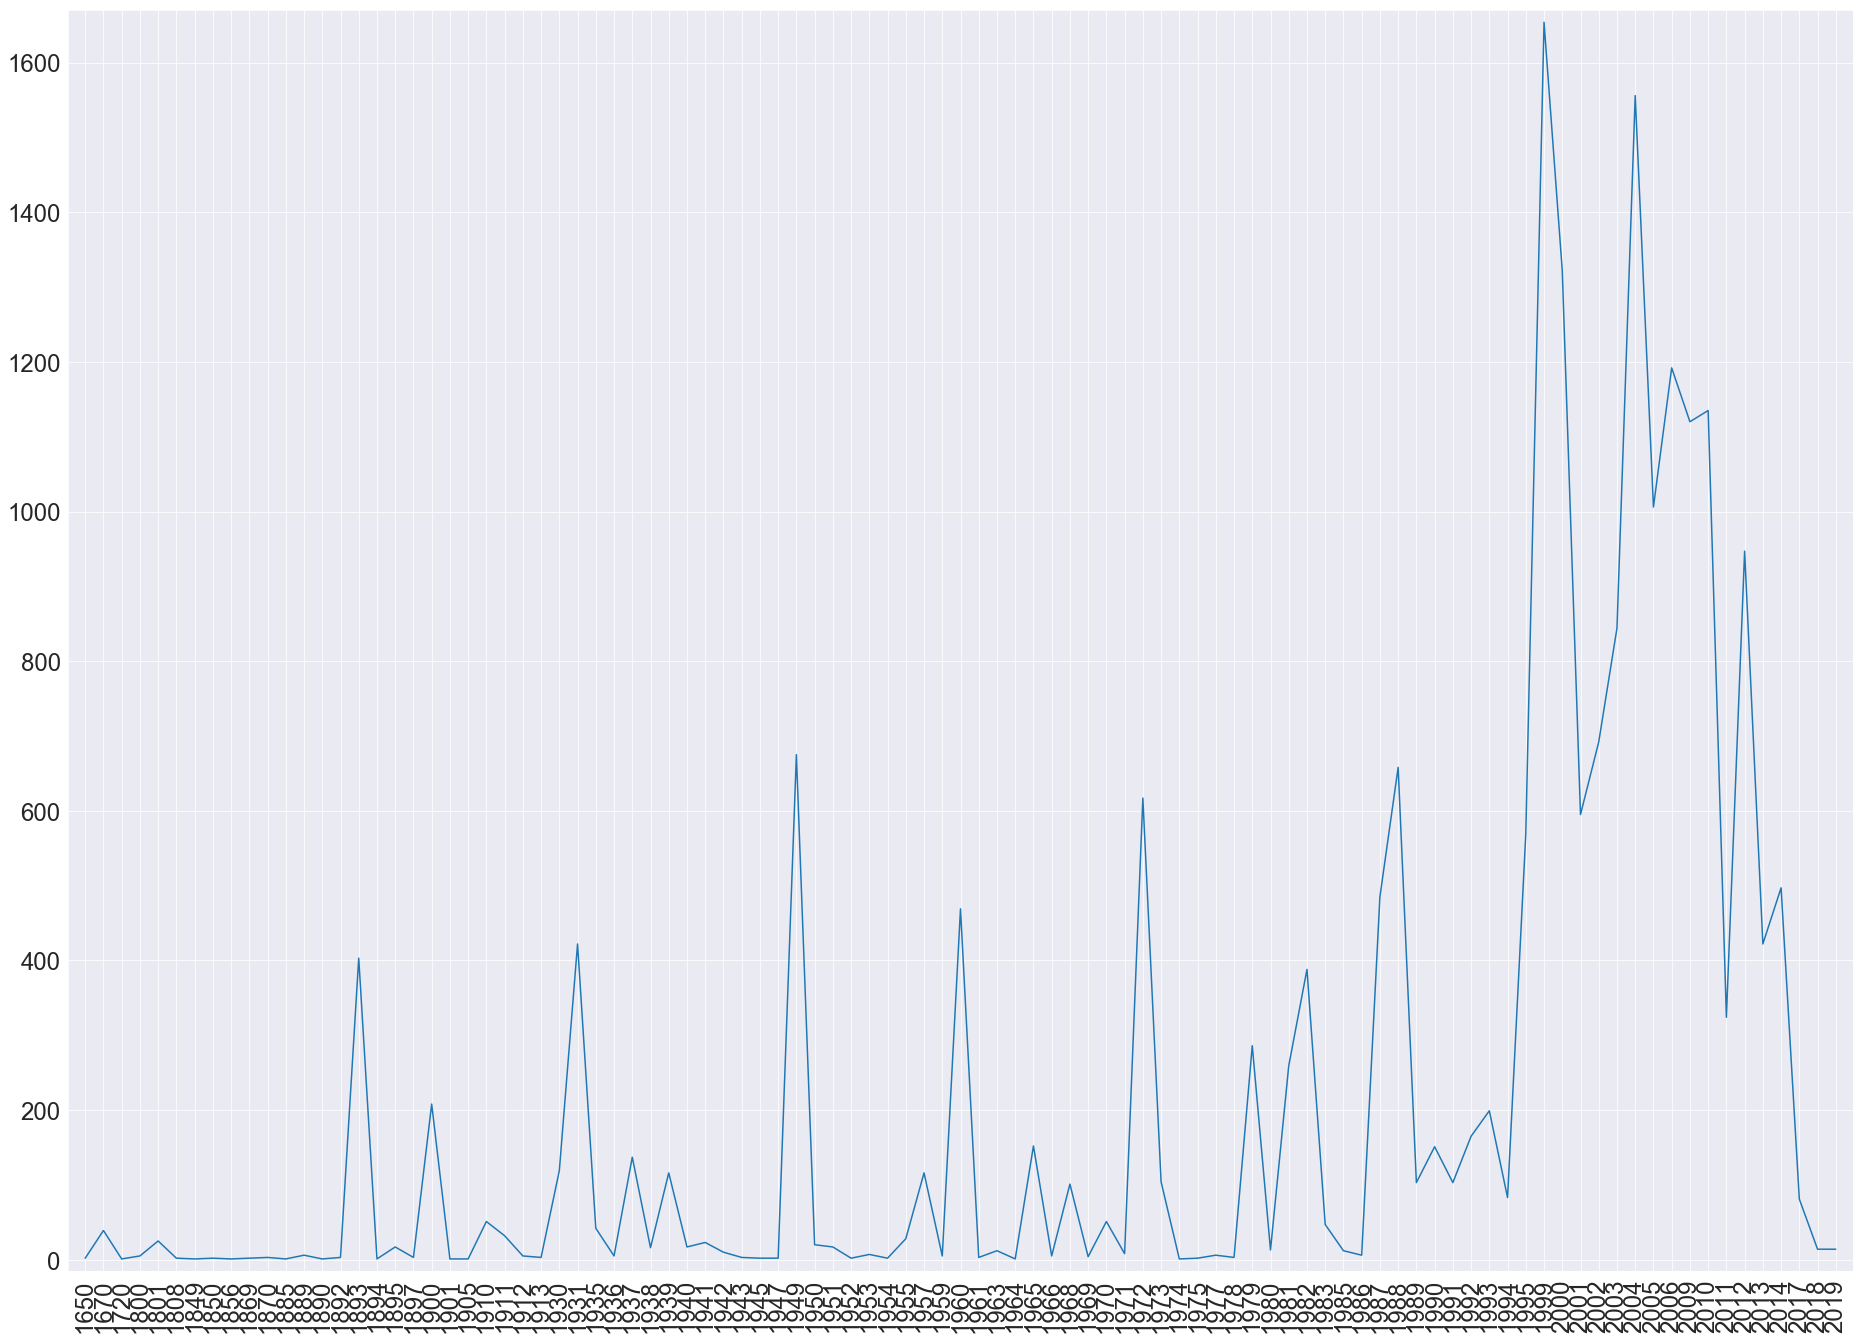

In [41]:
df = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/eigg.csv")
df = df.dropna(subset=["Start date year"])
plotNumObservationsByYear(withoutPeaks(df))

In [105]:
def averageObsPerPerson(tdf):
    tdf = tdf.dropna(subset=["Recorder"])
    people = list(set(tdf['Recorder']))
    obsPerPerson = list(map(lambda x: (x,len(tdf[tdf['Recorder']==x])), people))
    obsPerPerson = list(map(lambda x: (re.split("[;|]",x[0]),x[1]), obsPerPerson))
    obsPerPerson = list(map(lambda x: [(y,x[1]) for y in x[0]],obsPerPerson))
    obsPerPerson = [item for x in obsPerPerson for item in x]
    mapping = defaultdict(int)
    for item in obsPerPerson:
        mapping[item[0]] += item[1]
    return mapping.items()

def averageYearsPerPerson(tdf):
    tdf = tdf.dropna(subset=["Recorder"])
    people = list(set(tdf['Recorder']))
    returnsPerPerson = list(map(lambda x: (x,set(tdf[tdf['Recorder']==x]['Start date year'])), people))
    returnsPerPerson = list(map(lambda x: (re.split("[;|]",x[0]),x[1]), returnsPerPerson))
    returnsPerPerson = list(map(lambda x: [(y,x[1]) for y in x[0]],returnsPerPerson))
    returnsPerPerson = [item for x in returnsPerPerson for item in x]
    mapping = defaultdict(set)
    for item in returnsPerPerson:
        mapping[item[0]] = mapping[item[0]].union(item[1])
    return mapping.items()

def averageMonthsPerPerson(tdf):
    tdf = tdf.dropna(subset=["Recorder"])
    tdf = tdf.dropna(subset=["Start date month"])
    tdf = tdf.dropna(subset=["Start date day"])
    tdf = tdf.dropna(subset=["Start date year"])
    people = list(set(tdf['Recorder']))
    returnsPerPerson = list(map(lambda x: (x,set(list(zip(tdf[tdf['Recorder']==x]['Start date year'].values.tolist(),tdf[tdf['Recorder']==x]['Start date month'].values.tolist(),tdf[tdf['Recorder']==x]['Start date day'].values.tolist())))), people))
    returnsPerPerson = list(map(lambda x: (re.split("[;|]",x[0]),x[1]), returnsPerPerson))
    returnsPerPerson = list(map(lambda x: [(y,x[1]) for y in x[0]],returnsPerPerson))
    returnsPerPerson = [item for x in returnsPerPerson for item in x]
    mapping = defaultdict(set)
    for item in returnsPerPerson:
        mapping[item[0]] = mapping[item[0]].union(item[1])
    return mapping.items()
# averageMonthsPerPerson(df)

# Average observations per person

In [73]:
obsPerPerson = averageObsPerPerson(peaksOnly(df))
listOfObs = sorted(list(map(lambda x: x[1],obsPerPerson)))[:-1]
sum(listOfObs)/len(obsPerPerson)

{'Tony Janssens', 'Hodd, R.L.', 'Dave Trimble', 'Paula Olde-Wolbers', 'Horwath, A.', 'Alistair Kirk', ' Kungu, E.M.', 'Joe Cormack', 'Bob Turner', 'Amelia Mapson', 'David Kirk', 'Paul Turkentine', 'G. Moss', 'Barbara Soutar', 'Hill', 'Rachel Mapson', 'Paul Biggin', 'Audrey Turner', 'Chris Smout', 'Brian Ribbans', 'British Bryological Society meeting', 'Sally McConville', 'Johanna Carrie', ' Long, D.G.', 'Chris Spurrier', "O'Leary, S.V.", 'Jonathan Willet', 'Angela Williams', 'J.G. Rankin', 'P. Stannard', 'R.J. Cooke', 'L. Farrell', 'Lucy Kay', ' Chamberlain, D.F.', 'Hill, M.O.', 'Grace Fergusson', 'Sleath, J.D.', 'Jonathon Willet', 'Pool, M.', 'Chris Cheffings', 'Hancock, E.G.', 'Paul Kay', 'Chamberlain, D.F.', 'Phillips', 'J. Henry', 'Melanie Harding', 'C. Dixon', 'David Trimble', 'C. Cheffings', 'Jane Harris', " O'Leary, S.V.", 'Rachel Weldon', 'Callaghan, D.A.', 'Jon Mercer', 'H.J.B. Birks', 'Mark Woombs', 'Robert Hamill', 'D. Gilbert', ' et al.', 'Chamberlain', 'Guy Moss', 'Berni M

54.30434782608695

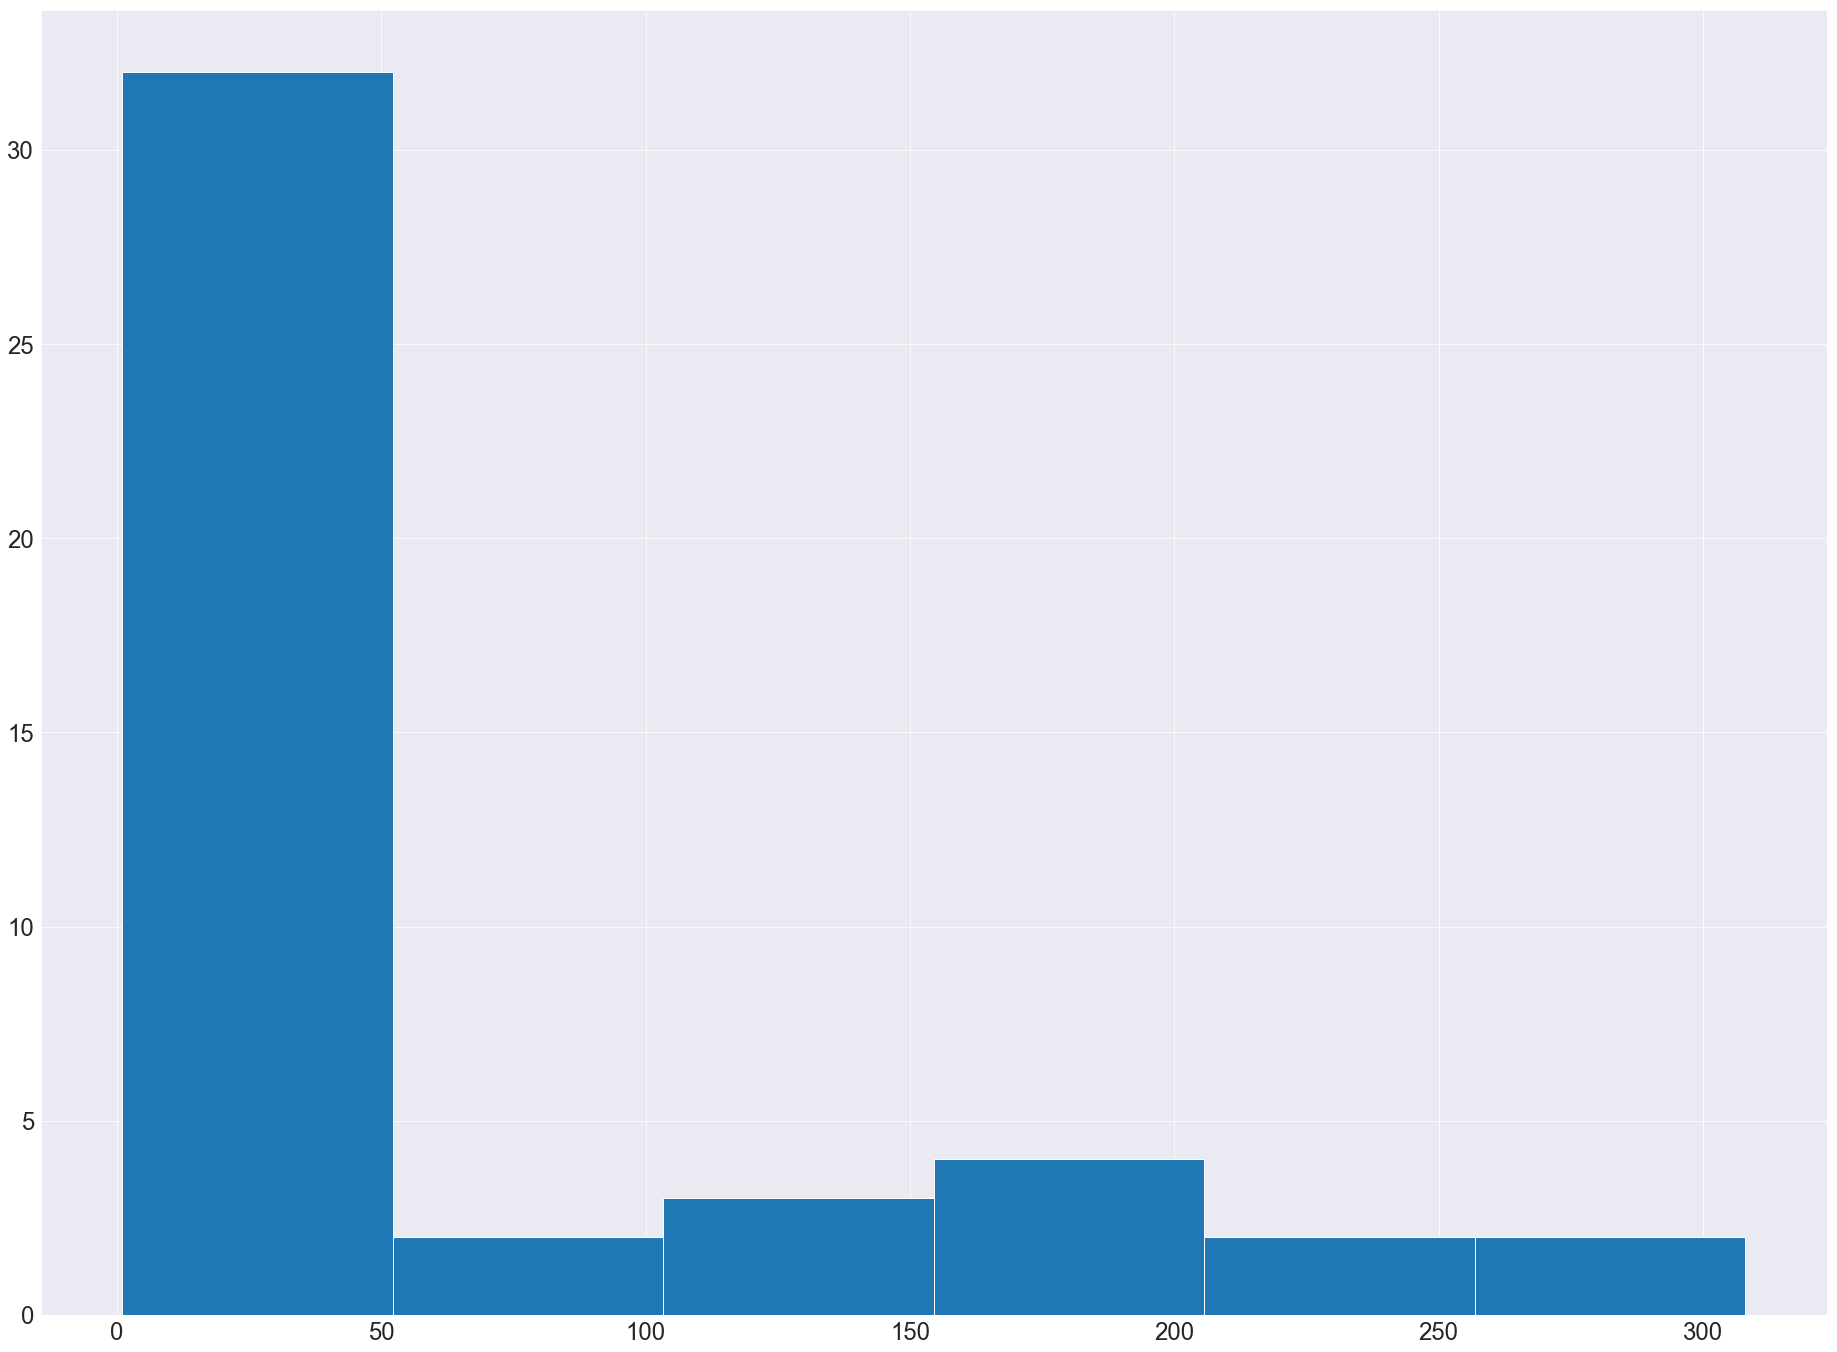

In [74]:
plt.hist(listOfObs,bins=int(max(listOfObs)/50))
plt.show()

In [75]:
obsPerPerson = averageObsPerPerson(withoutPeaks(df))
listOfObs = sorted(list(map(lambda x: x[1],obsPerPerson)))[:-1]
sum(listOfObs)/len(obsPerPerson)

42.895973154362416

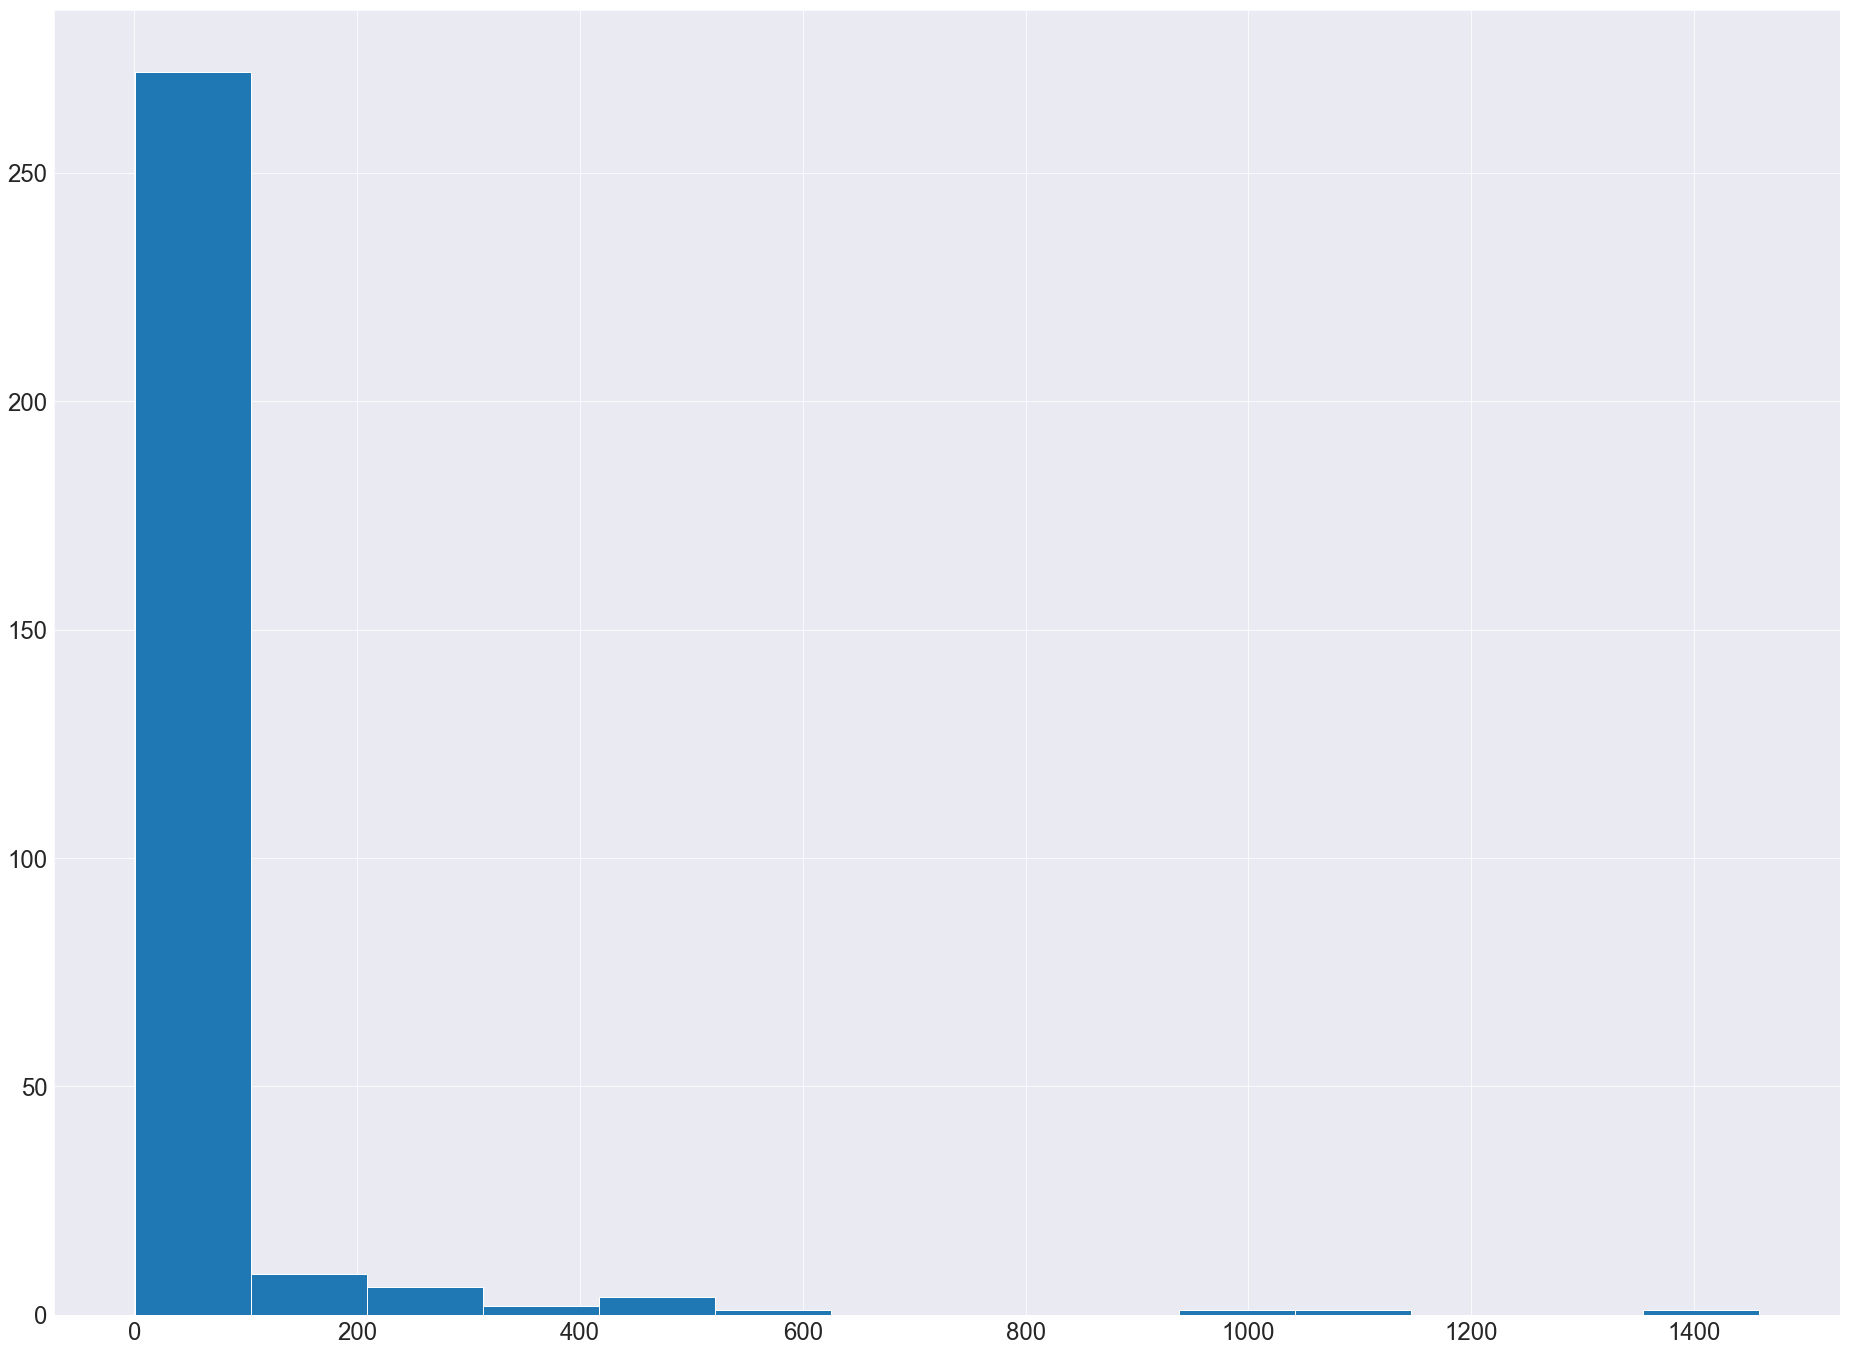

In [76]:
plt.hist(listOfObs,bins=int(max(listOfObs)/100))
plt.show()

# Coming back

In [79]:
yearsPerPerson = averageYearsPerPerson(peaksOnly(df))
listOfObs = sorted(list(map(lambda x: len(x[1]),yearsPerPerson)))[:-1]
sum(listOfObs)/(len(yearsPerPerson)-1)

{'Tony Janssens', 'Hodd, R.L.', 'Dave Trimble', 'Paula Olde-Wolbers', 'Horwath, A.', 'Alistair Kirk', ' Kungu, E.M.', 'Joe Cormack', 'Bob Turner', 'Amelia Mapson', 'David Kirk', 'Paul Turkentine', 'G. Moss', 'Barbara Soutar', 'Hill', 'Rachel Mapson', 'Paul Biggin', 'Audrey Turner', 'Chris Smout', 'Brian Ribbans', 'British Bryological Society meeting', 'Sally McConville', 'Johanna Carrie', ' Long, D.G.', 'Chris Spurrier', "O'Leary, S.V.", 'Jonathan Willet', 'Angela Williams', 'J.G. Rankin', 'P. Stannard', 'R.J. Cooke', 'L. Farrell', 'Lucy Kay', ' Chamberlain, D.F.', 'Hill, M.O.', 'Grace Fergusson', 'Sleath, J.D.', 'Jonathon Willet', 'Pool, M.', 'Chris Cheffings', 'Hancock, E.G.', 'Paul Kay', 'Chamberlain, D.F.', 'Phillips', 'J. Henry', 'Melanie Harding', 'C. Dixon', 'David Trimble', 'C. Cheffings', 'Jane Harris', " O'Leary, S.V.", 'Rachel Weldon', 'Callaghan, D.A.', 'Jon Mercer', 'H.J.B. Birks', 'Mark Woombs', 'Robert Hamill', 'D. Gilbert', ' et al.', 'Chamberlain', 'Guy Moss', 'Berni M

1.0

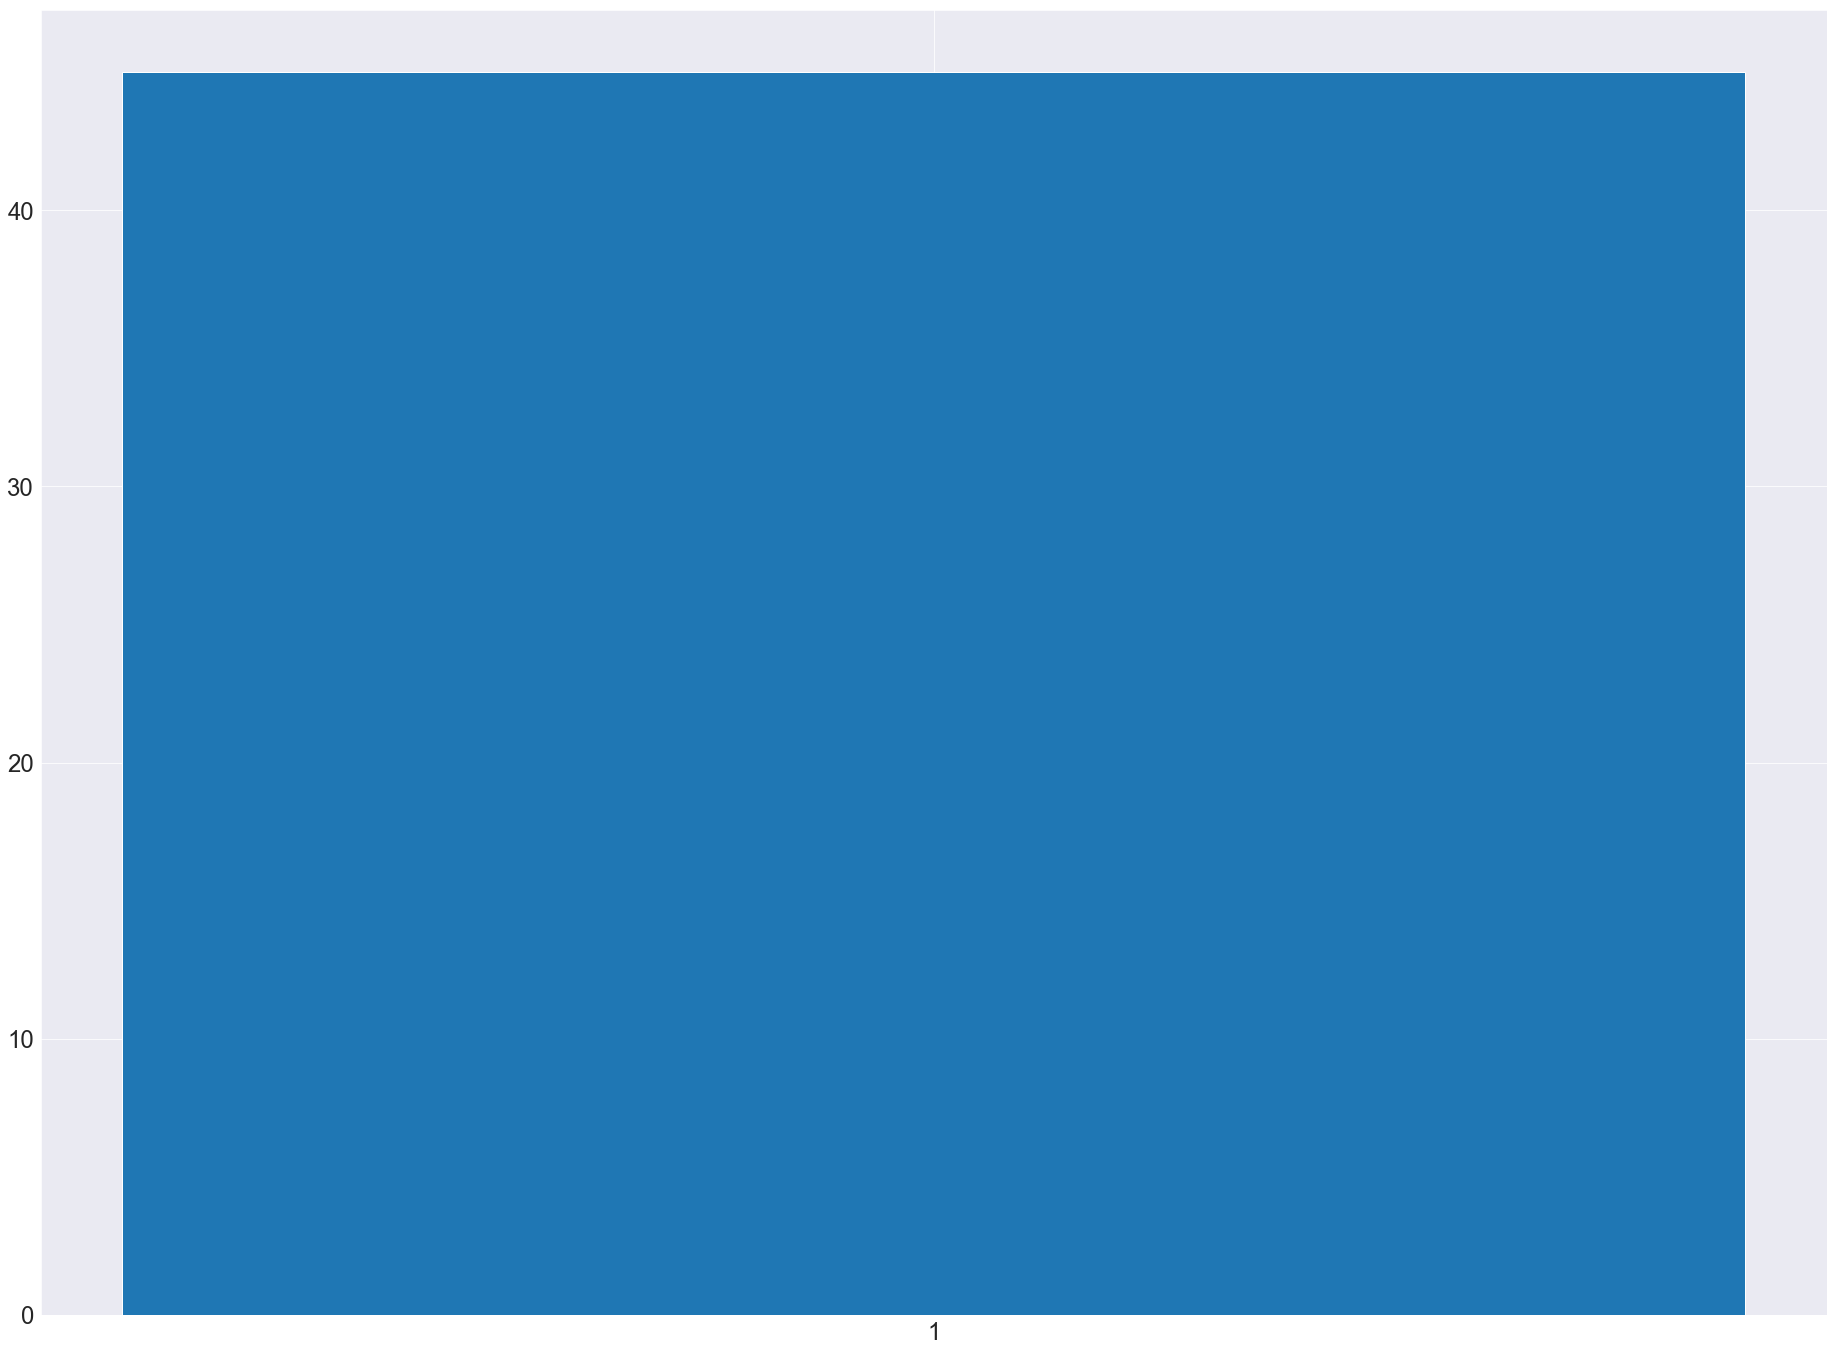

In [67]:
fig, ax = plt.subplots(1,1)
ax.hist(listOfObs,bins=int(max(listOfObs)))
plt.xticks([1])
plt.show()

In [53]:
yearsPerPerson = averageYearsPerPerson(withoutPeaks(df))
listOfObs = sorted(list(map(lambda x: len(x[1]),yearsPerPerson)))[:-1]
sum(listOfObs)/len(yearsPerPerson)

1.5838926174496644

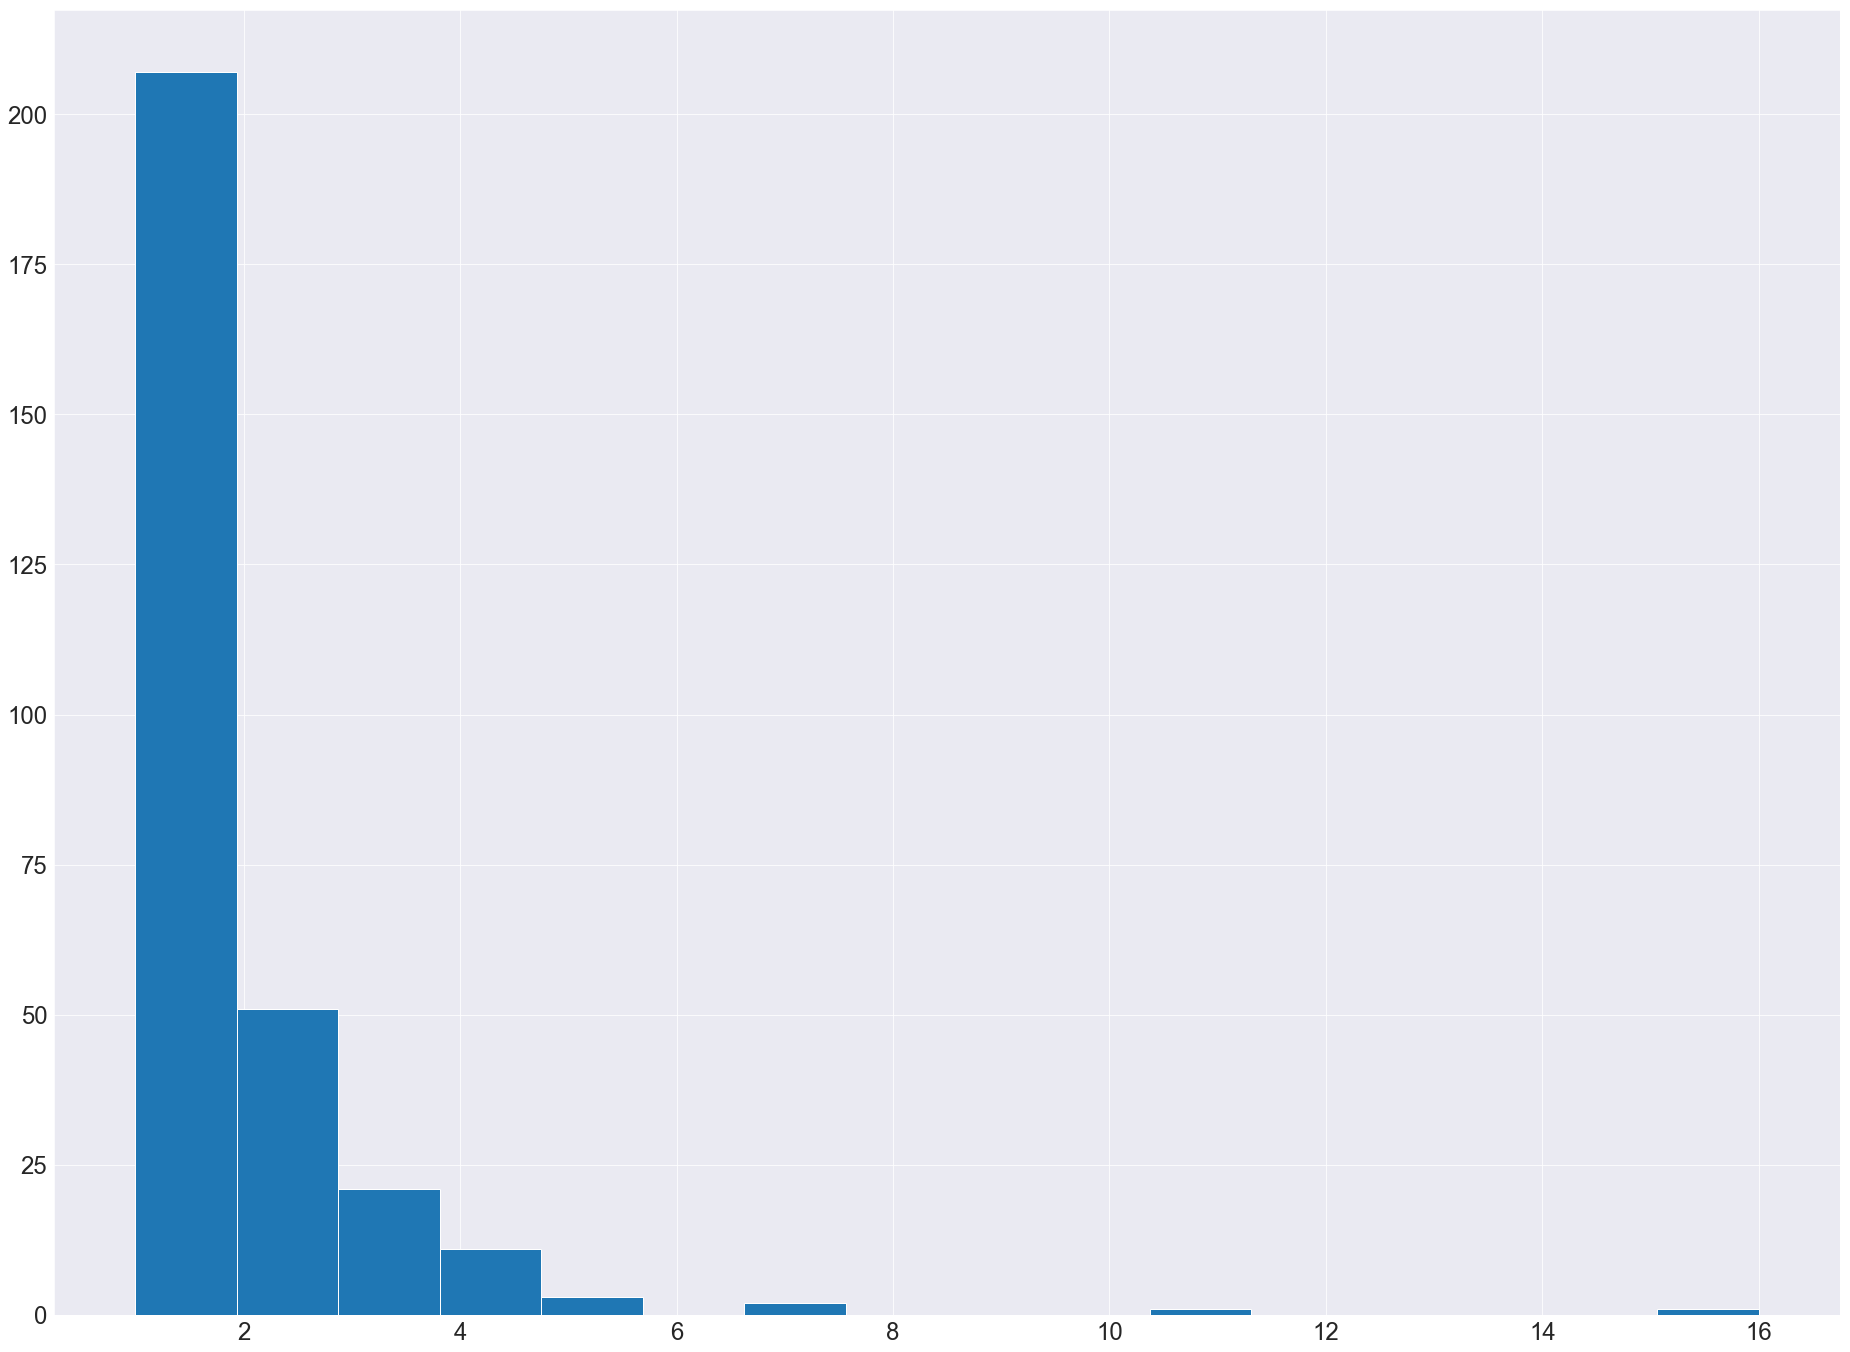

In [54]:
plt.hist(listOfObs,bins=int(max(listOfObs)/1))
plt.show()

In [107]:
yearsPerPerson = averageMonthsPerPerson(peaksOnly(df))
listOfObs = sorted(list(map(lambda x: len(x[1]),yearsPerPerson)))[:-1]
sum(listOfObs)/(len(yearsPerPerson)-1)

{'Tony Janssens', 'Hodd, R.L.', 'Dave Trimble', 'Paula Olde-Wolbers', 'Horwath, A.', 'Alistair Kirk', ' Kungu, E.M.', 'Joe Cormack', 'Bob Turner', 'Amelia Mapson', 'David Kirk', 'Paul Turkentine', 'G. Moss', 'Barbara Soutar', 'Hill', 'Rachel Mapson', 'Paul Biggin', 'Audrey Turner', 'Chris Smout', 'Brian Ribbans', 'British Bryological Society meeting', 'Sally McConville', 'Johanna Carrie', ' Long, D.G.', 'Chris Spurrier', "O'Leary, S.V.", 'Jonathan Willet', 'Angela Williams', 'J.G. Rankin', 'P. Stannard', 'R.J. Cooke', 'L. Farrell', 'Lucy Kay', ' Chamberlain, D.F.', 'Hill, M.O.', 'Grace Fergusson', 'Sleath, J.D.', 'Jonathon Willet', 'Pool, M.', 'Chris Cheffings', 'Hancock, E.G.', 'Paul Kay', 'Chamberlain, D.F.', 'Phillips', 'J. Henry', 'Melanie Harding', 'C. Dixon', 'David Trimble', 'C. Cheffings', 'Jane Harris', " O'Leary, S.V.", 'Rachel Weldon', 'Callaghan, D.A.', 'Jon Mercer', 'H.J.B. Birks', 'Mark Woombs', 'Robert Hamill', 'D. Gilbert', ' et al.', 'Chamberlain', 'Guy Moss', 'Berni M

2.046511627906977

# On Skye

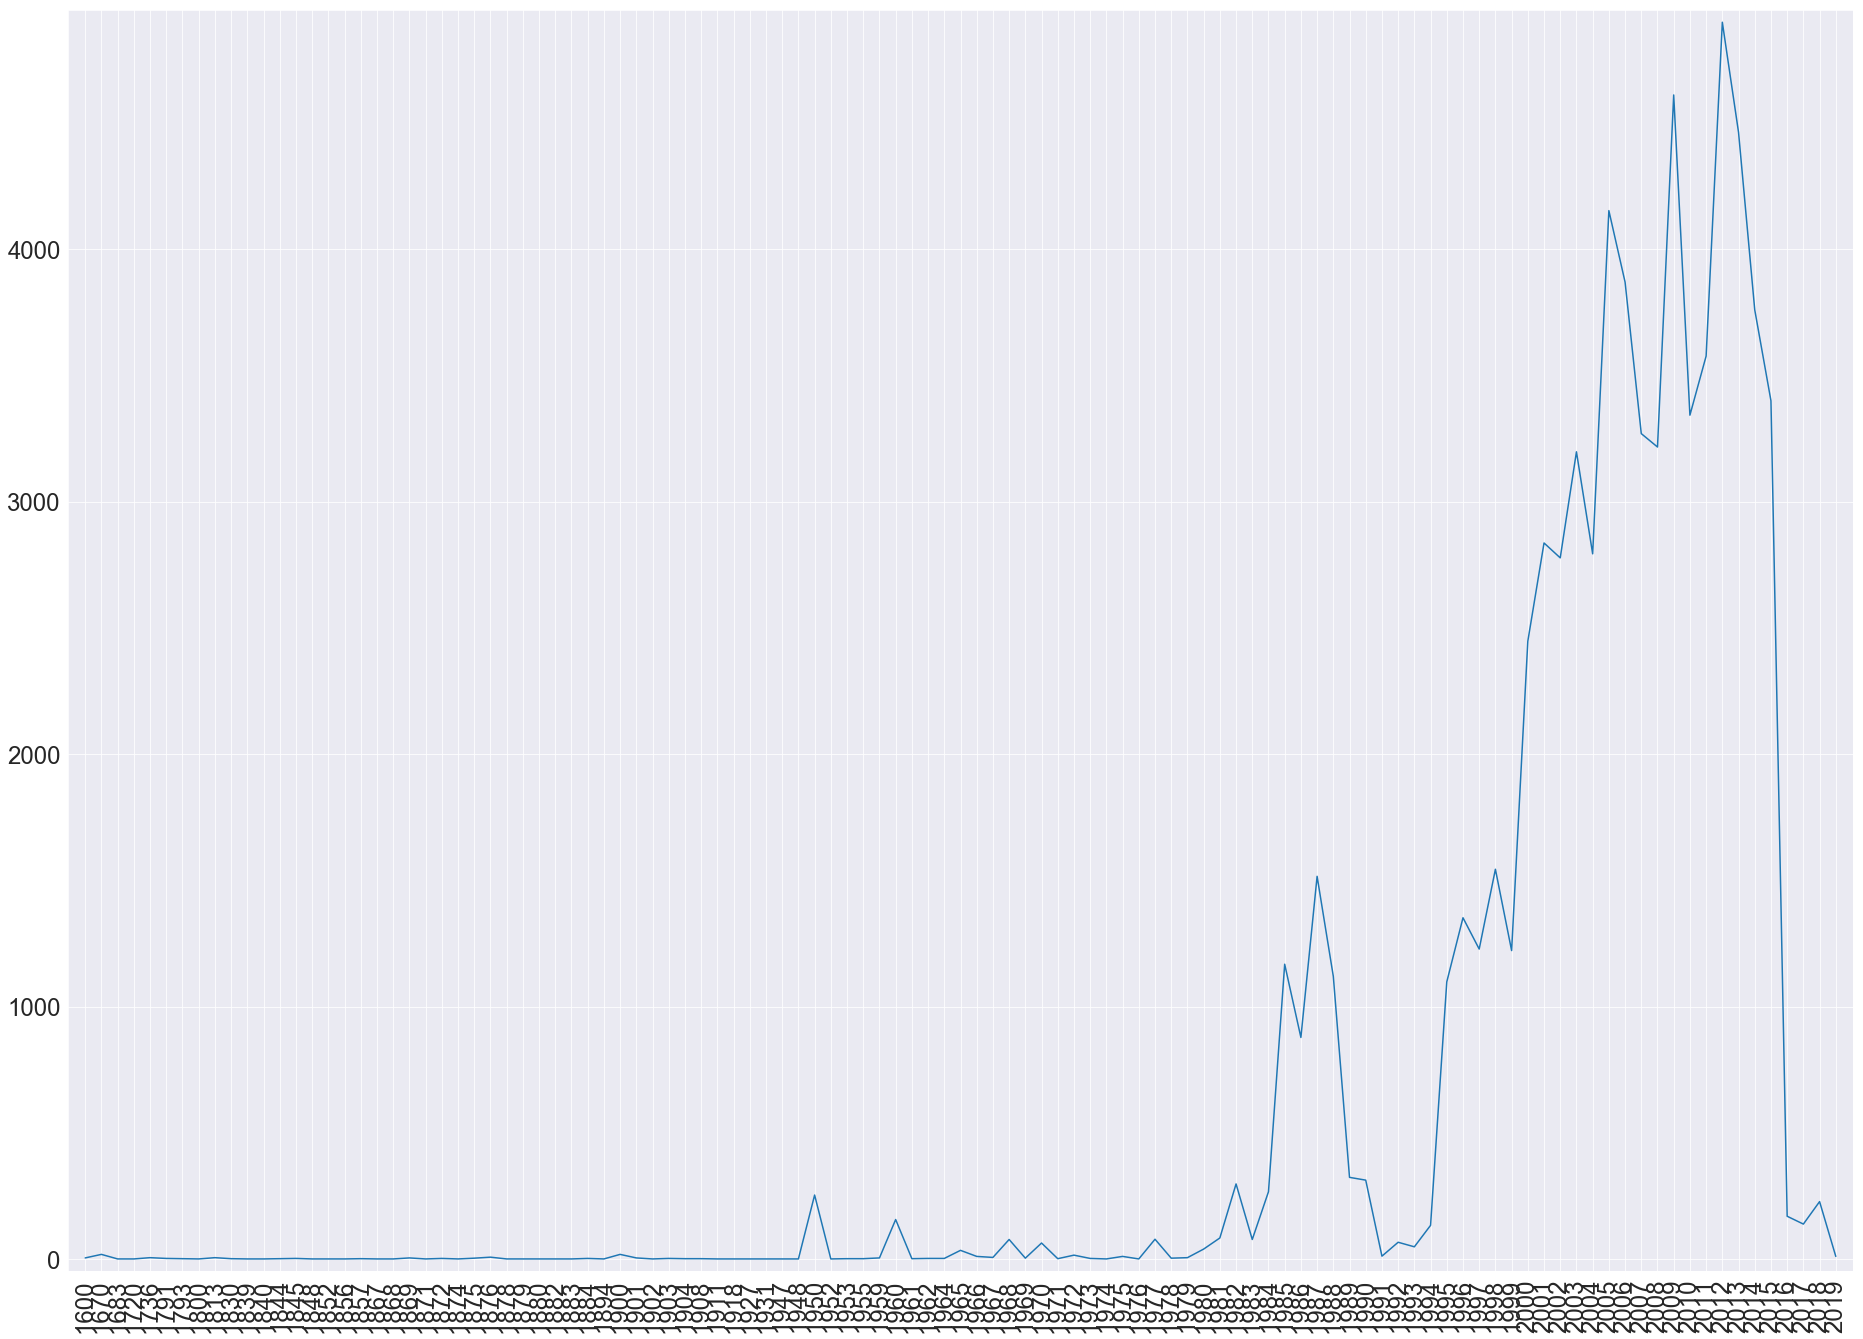

In [130]:
dfs = pd.read_csv("C:/Users/davie/Desktop/Masters/Dissertation/Code/DissertationCode/Eigg/IslandDatasets/skye.csv")
dfs = dfs.dropna(subset=["Start date year"])
plotNumObservationsByYear(dfs)

In [131]:
obsPerPerson = averageObsPerPerson(peaksOnly(dfs))
listOfObs = sorted(list(map(lambda x: x[1],obsPerPerson)))[:-1]
sum(listOfObs)/len(obsPerPerson)

{'Anna Jennings', 'Nigel Willby, John Day', 'Ella Simpson', 'f1430681-ab05-111c-ceb0-774d5348916b', 'Maureen Marriott', 'McLachlan, Colin', 'Mark kelly', 'Prentice', 'Stewart, Tam', 'Suzanne Miller', 'Sheena Butler', 'Robert Colligan', 'K. Thomson', 'N.J. Willby', 'Ella  Simpson', 'Mrs M Towland', 'Mrs J Gardner', 'McLean, Claire', 'ajm (Alan Millar)', 'Colin Dunlop', 'Diane Megias', 'Alan Law', 'G C Luscombe', 'Mitchell', 'Maddison, Louisa', 'Garry  Nixon', 'Gerard Durkin', 'Alan Millar', 'tony shaw', 'A.B.G. Averis', 'Suzanne  Pettigrew', 'et al.', 'John  Creaney', 'x @TamwalkerT', 'Helyn Long', 'J. Day', 'John Shaw', 'E.K. Lindsay'}


2.3823529411764706

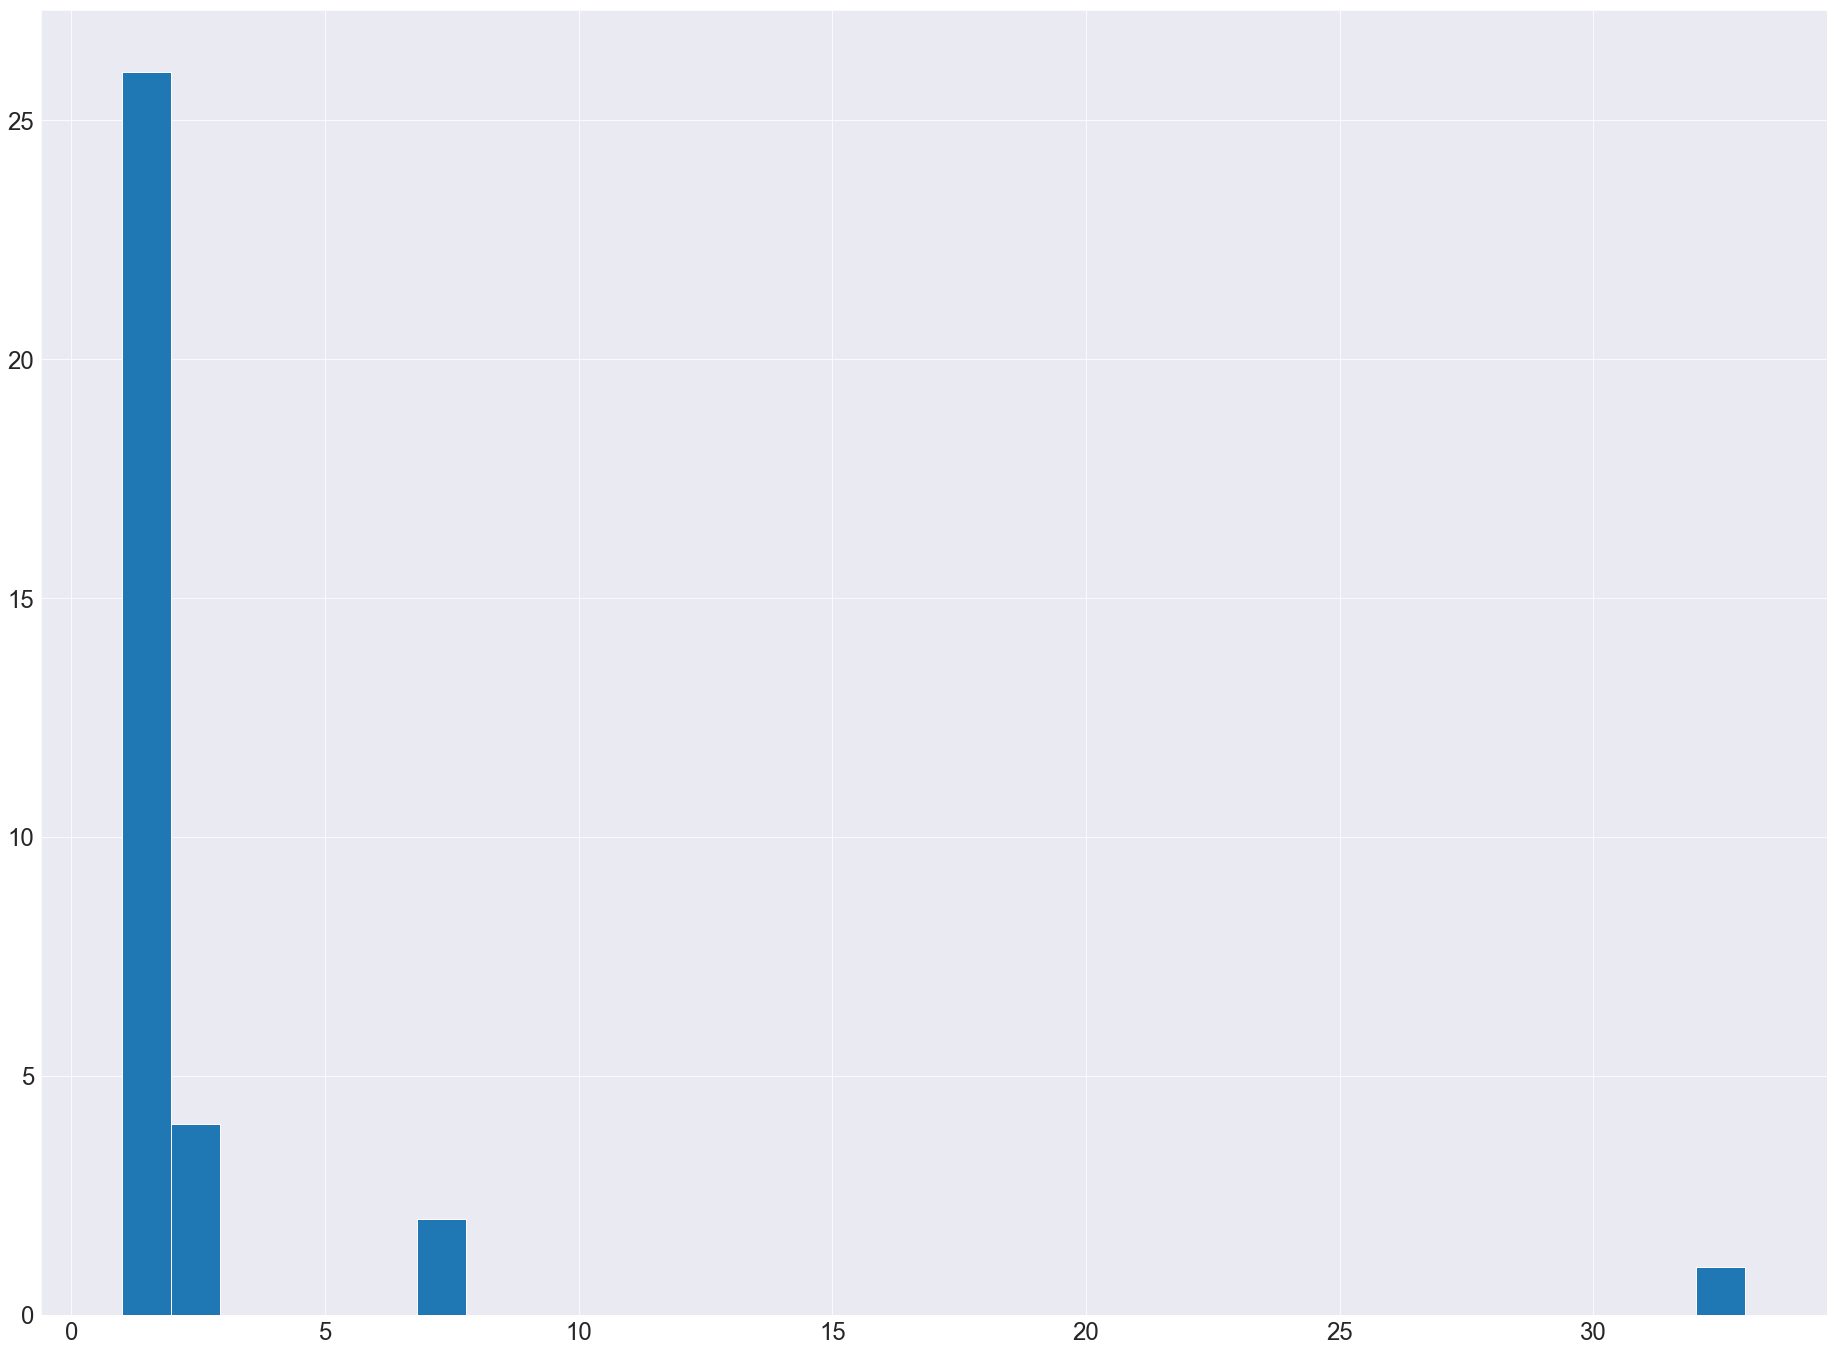

In [133]:
plt.hist(listOfObs,bins=int(max(listOfObs)))
plt.show()

In [134]:
obsPerPerson = averageObsPerPerson(withoutPeaks(dfs))
listOfObs = sorted(list(map(lambda x: x[1],obsPerPerson)))[:-1]
sum(listOfObs)/len(obsPerPerson)

49.39393939393939

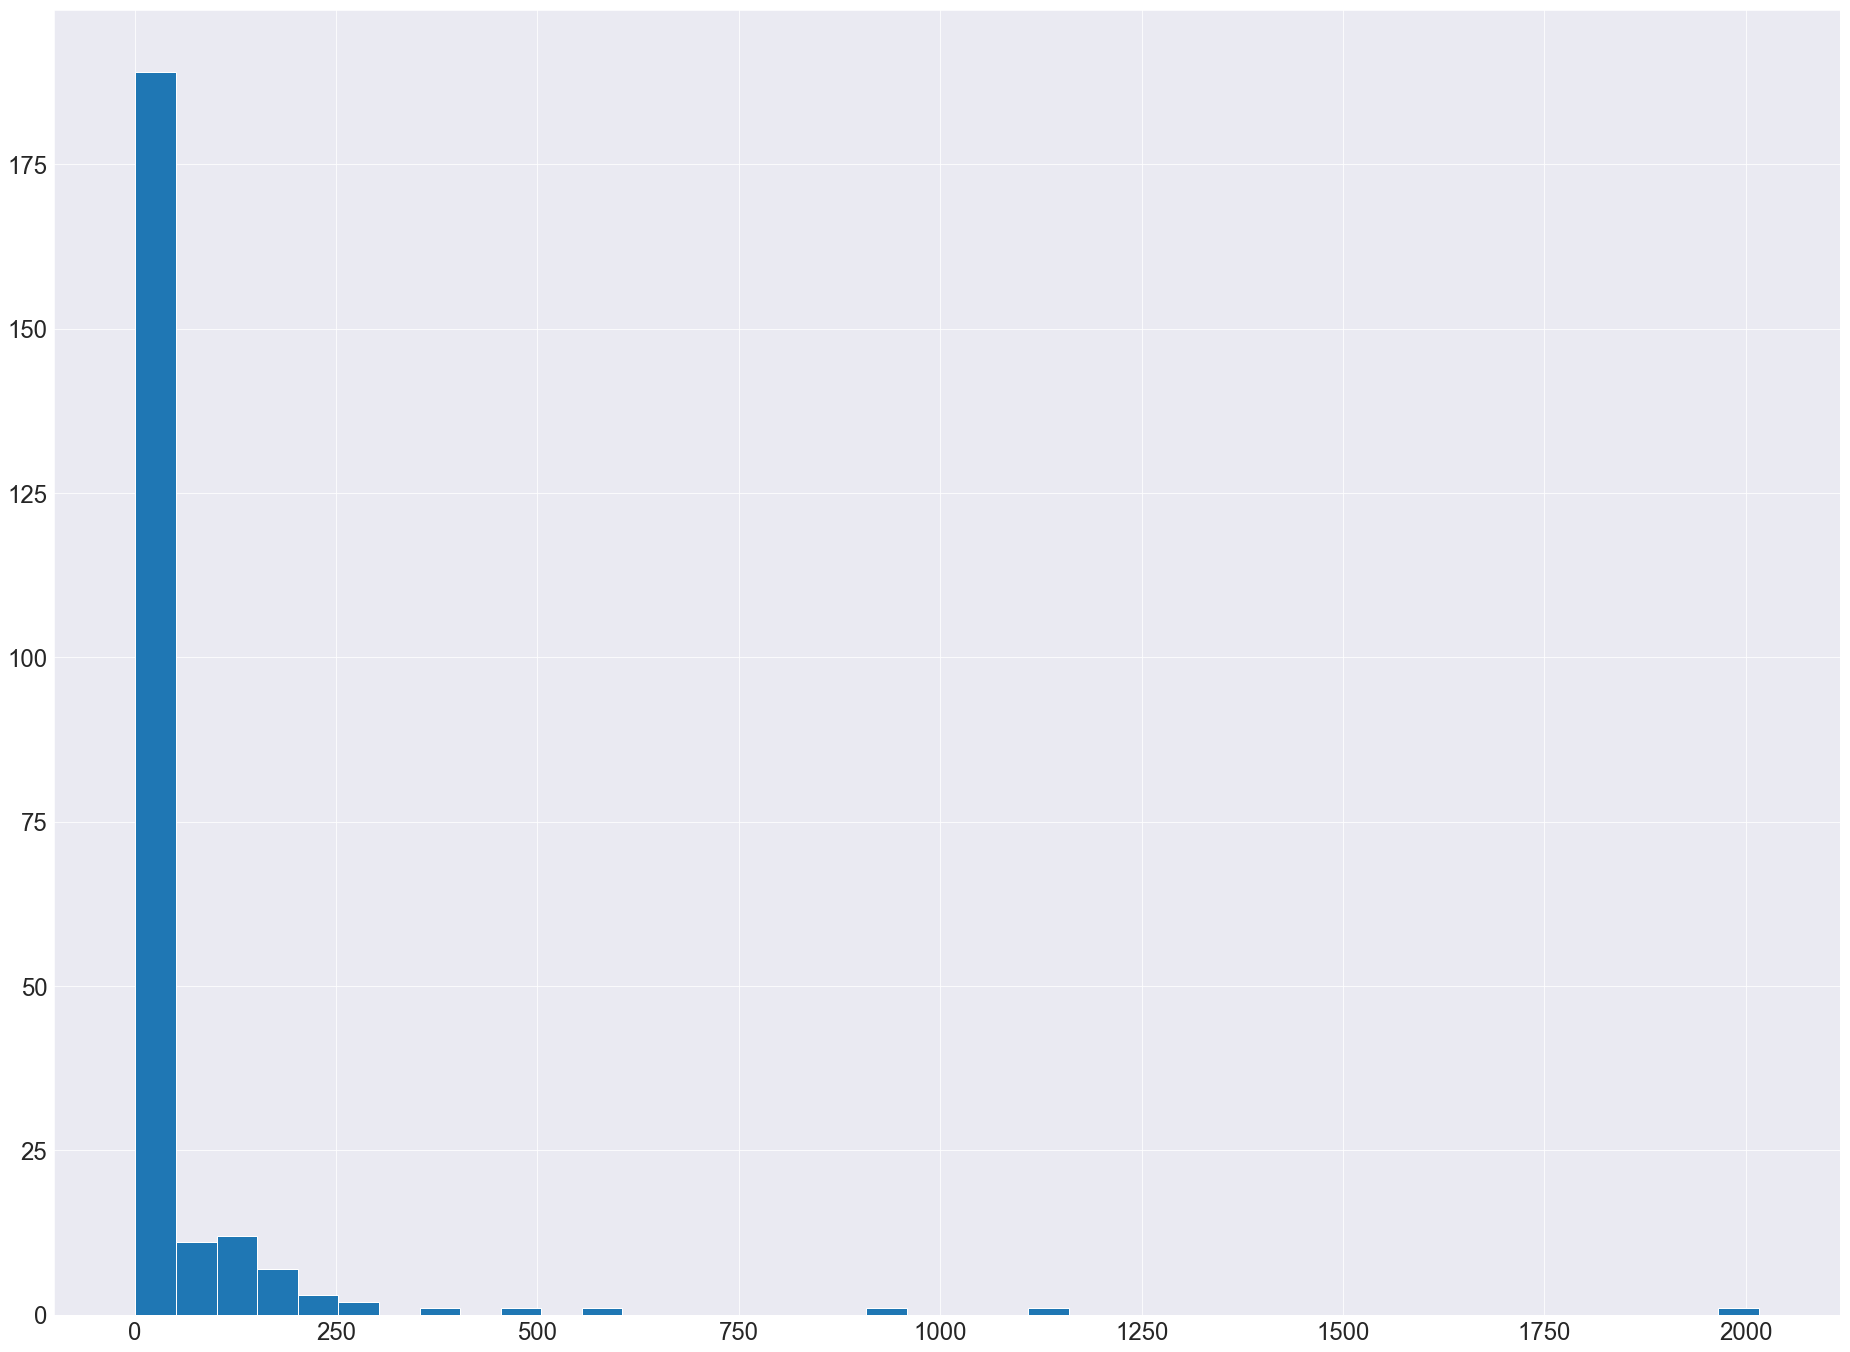

In [136]:
plt.hist(listOfObs,bins=int(max(listOfObs)/50))
plt.show()

In [138]:
yearsPerPerson = averageYearsPerPerson(peaksOnly(dfs))
listOfObs = sorted(list(map(lambda x: len(x[1]),yearsPerPerson)))[:-1]
sum(listOfObs)/(len(yearsPerPerson)-1)

{'Anna Jennings', 'Nigel Willby, John Day', 'Ella Simpson', 'f1430681-ab05-111c-ceb0-774d5348916b', 'Maureen Marriott', 'McLachlan, Colin', 'Mark kelly', 'Prentice', 'Stewart, Tam', 'Suzanne Miller', 'Sheena Butler', 'Robert Colligan', 'K. Thomson', 'N.J. Willby', 'Ella  Simpson', 'Mrs M Towland', 'Mrs J Gardner', 'McLean, Claire', 'ajm (Alan Millar)', 'Colin Dunlop', 'Diane Megias', 'Alan Law', 'G C Luscombe', 'Mitchell', 'Maddison, Louisa', 'Garry  Nixon', 'Gerard Durkin', 'Alan Millar', 'tony shaw', 'A.B.G. Averis', 'Suzanne  Pettigrew', 'et al.', 'John  Creaney', 'x @TamwalkerT', 'Helyn Long', 'J. Day', 'John Shaw', 'E.K. Lindsay'}


1.0

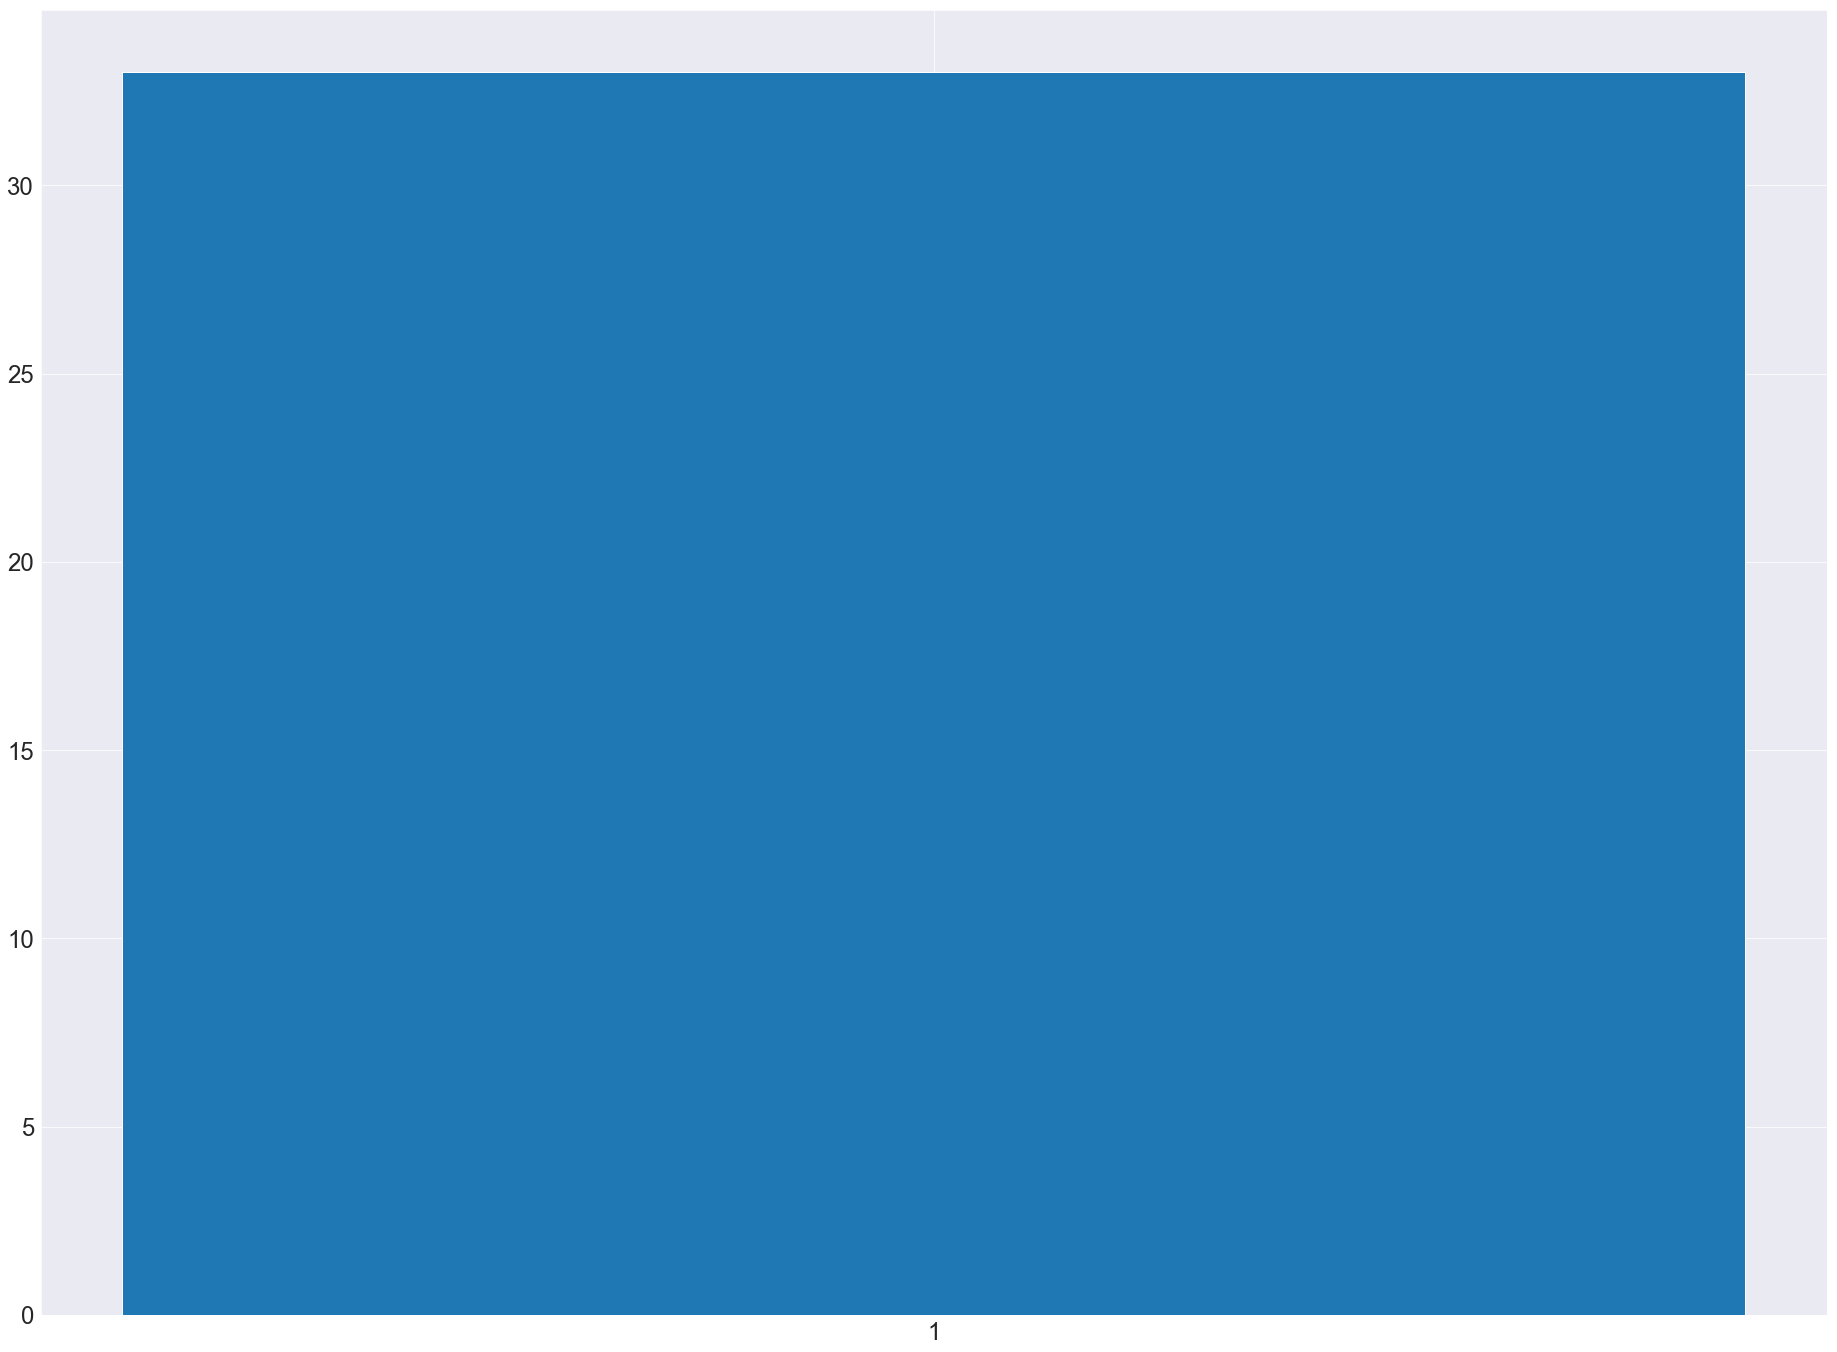

In [139]:
fig, ax = plt.subplots(1,1)
ax.hist(listOfObs,bins=int(max(listOfObs)))
plt.xticks([1])
plt.show()

In [140]:
yearsPerPerson = averageYearsPerPerson(withoutPeaks(dfs))
listOfObs = sorted(list(map(lambda x: len(x[1]),yearsPerPerson)))[:-1]
sum(listOfObs)/(len(yearsPerPerson)-1)

1.7826086956521738

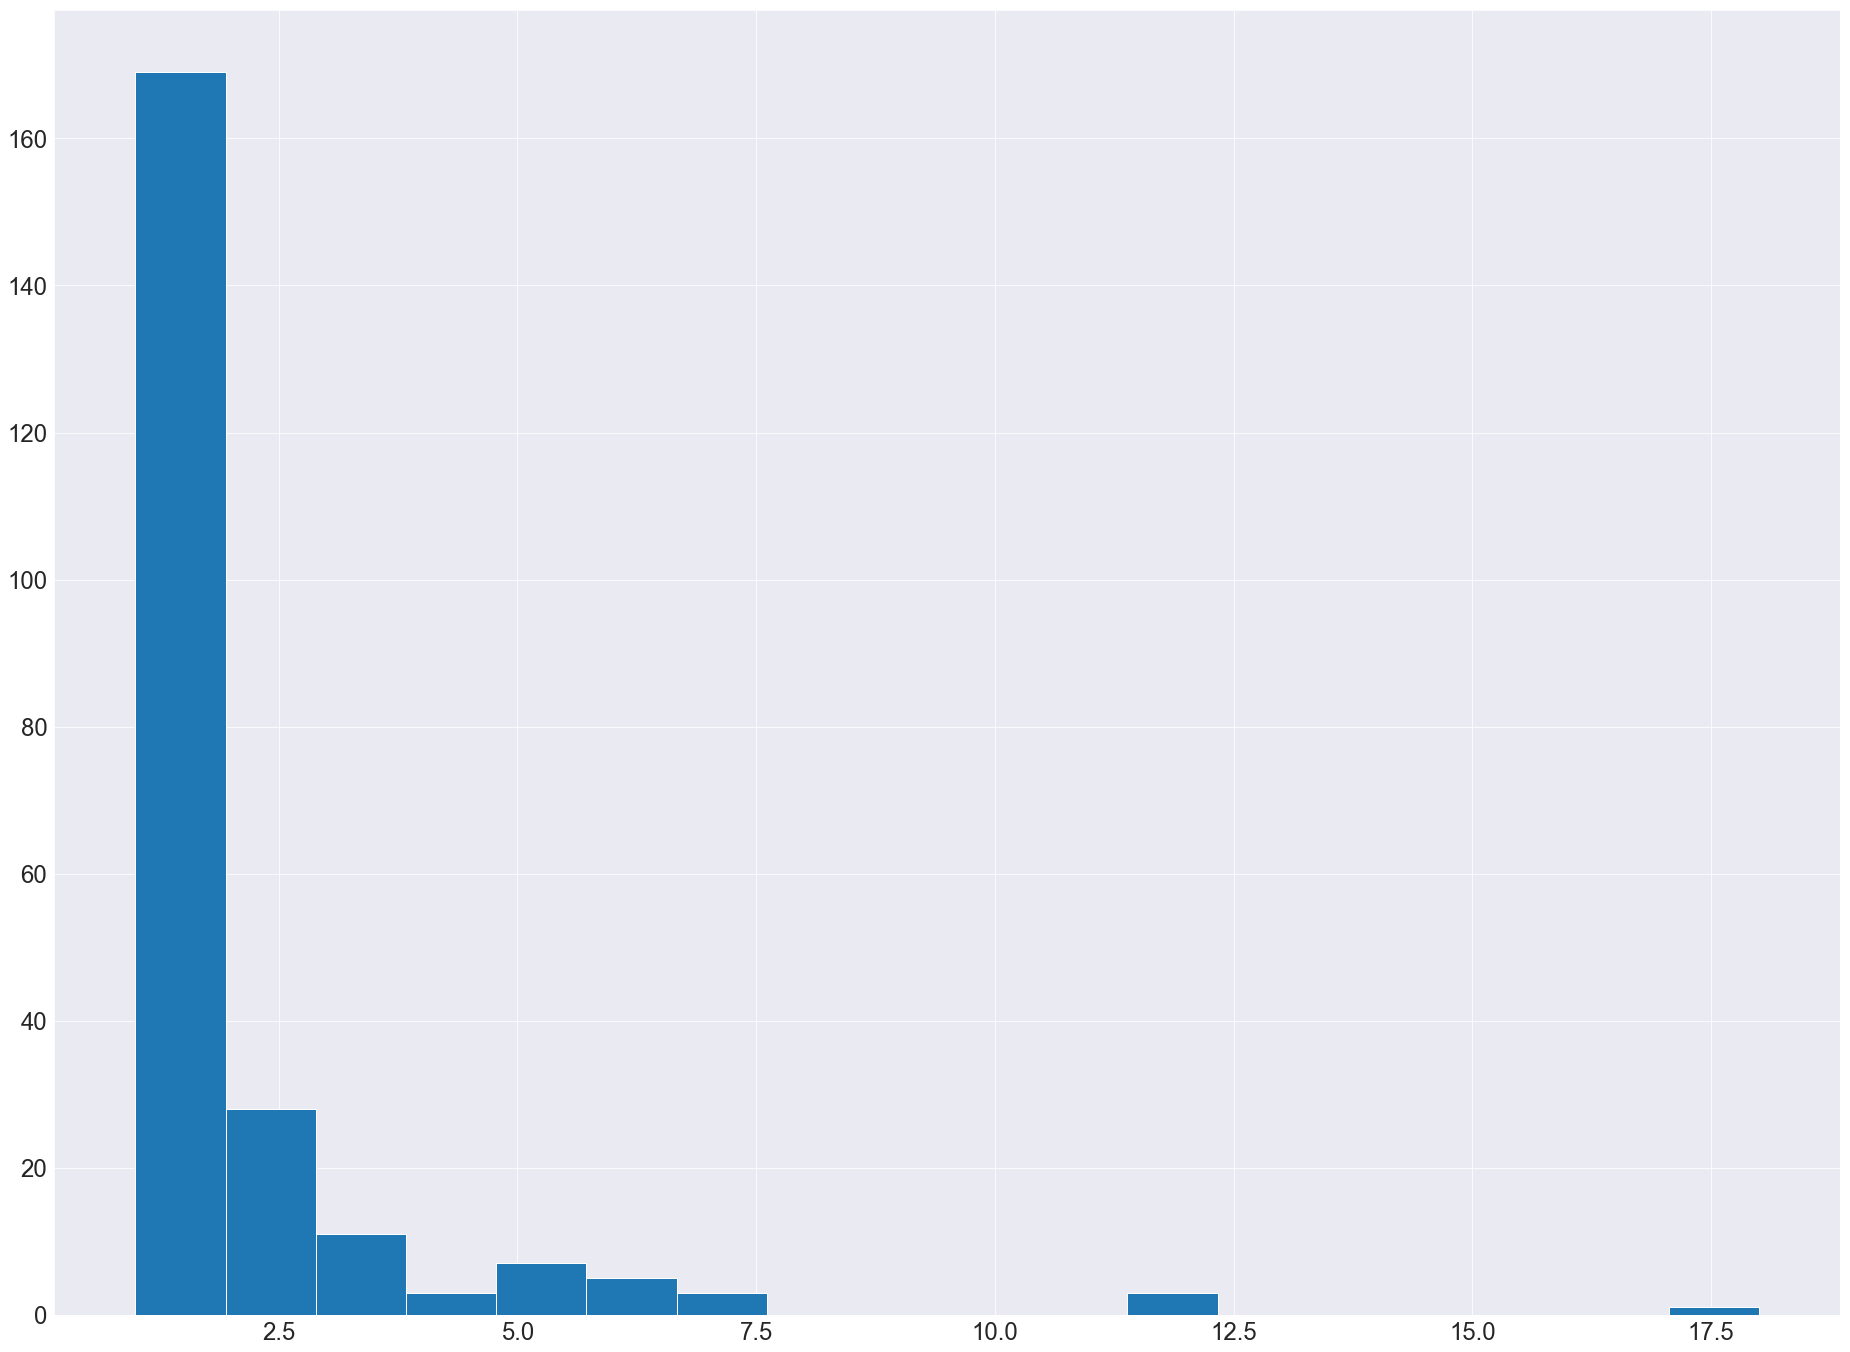

In [142]:
fig, ax = plt.subplots(1,1)
ax.hist(listOfObs,bins=int(max(listOfObs)))
plt.show()

### Conclusion

There is no correlation between Eigg's buyout and Skye:

- The chart for both long-term aspects are the same, aka they follow the same trends of islands viewings 
- But for the peaks on Eigg, the corresponding stuff on Skye is tiny

# Intersection of people

In [32]:
dfNoPeaks = withoutPeaks(df)
dfPeaks = peaksOnly(df)

dfNoPeaks = dfNoPeaks.dropna(subset=["Recorder"])
dfPeaks = dfPeaks.dropna(subset=["Recorder"])

namesPeaks = set([item for x in list(map(lambda x: re.split("[;|]",x),list(set(dfPeaks['Recorder'])))) for item in x])
namesNoPeaks = set([item for x in list(map(lambda x: re.split("[;|]",x),list(set(dfNoPeaks['Recorder'])))) for item in x])
final = namesPeaks.intersection(namesNoPeaks)

len(namesPeaks),len(namesNoPeaks),len(final)

(114, 298, 47)

# People not in organisations

In [137]:
# noMissingRecorders = df.dropna(subset=["Recorder"])
len(dfs[dfs["Dataset ID"].isnull()])

0